# Operadora Megaline 

En esta investigación se realizará un análisis al datset de Megaline para estudiar los datos copilados en el 2018, y conocer qué tarifa de prepago genera más ingresos para el operador; se tendrá que analizar el comportamiento de los clientes en las llamadas, en los SMS, y saber cuál es la tarifa que más utilizan para esto,


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Realizar un análisis de datos.
4. Probar las hipótesis.
5. Escribir una conclusión general

## Inicialización

In [1]:
#Cargar las librerías
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

### Cargar los datos

In [2]:
megaline_data = pd.read_csv('/datasets/megaline_users.csv')
megaline_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [3]:
megaline_data1 = pd.read_csv('/datasets/megaline_calls.csv')
megaline_data1

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [4]:
megaline_data2 = pd.read_csv('/datasets/megaline_internet.csv')
megaline_data2

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [5]:
megaline_data3 = pd.read_csv('/datasets/megaline_messages.csv')
megaline_data3

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [6]:
megaline_data4 = pd.read_csv('/datasets/megaline_plans.csv')
megaline_data4

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Se decidió observar las cinco tablas de la empresa, debido a que se necesita analizar la cantidad de usuarios que hay, las llamadas, los sms, los mb utilizados, y como son las tarifas de los planes, para poder decidir que realizar para poder hallar los ingresos de cada usuario, y saber que plan genera más ingresos .

### Explorar la información general.

In [7]:
megaline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
megaline_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
megaline_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
megaline_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


No se encontraron datos inapropiados en el dataset; Sin embargo, se encontró que la columna "reg_date" del dataframe de los usuarios no estaba en formato fecha, por este motivo, se cambió el tipo de formato; asimismo, se pudo observar que la única columna que presenta datos ausentes es la columna 'churn_date'. 

### Conclusiones y siguientes pasos

Después de observar y analizar los datos generales, se pudo concluir que con que haya valores ausentes en aquella columna se debe a que la tarifa se estaba usando cuando se recuperaron los datos, así que se tendrá que decidir como lidiar con estos datos, ya que son muchos. Por este motivo, para los siguientes pasos, se tratarán estos datos, para después comenzar con el análisis de los mismos, probar las hipótesis del objetivo general, y concluir con los hallazgos encontrados en esta investigación.

## Preprocesar los datos

In [11]:
megaline_data['reg_date'] = pd.to_datetime(megaline_data['reg_date'], format='%Y-%m-%dT%H:%M')

In [12]:
megaline_data['month'] = megaline_data['reg_date'].dt.month
megaline_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5


In [13]:
megaline_data1['call_date'] = pd.to_datetime(megaline_data1['call_date'], format='%Y-%m-%dT%H:%M')

In [14]:
megaline_data1['month'] = megaline_data1['call_date'].dt.month
megaline_data1.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [15]:
megaline_data2['session_date'] = pd.to_datetime(megaline_data2['session_date'], format='%Y-%m-%dT%H:%M')

In [16]:
megaline_data2['month'] = megaline_data2['session_date'].dt.month
megaline_data2.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [17]:
megaline_data3['message_date'] = pd.to_datetime(megaline_data3['message_date'], format='%Y-%m-%dT%H:%M')

In [18]:
megaline_data3['month'] = megaline_data3['message_date'].dt.month
megaline_data3.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [19]:
md1 = megaline_data1.groupby(['user_id', 'month'])['duration'].agg({'sum'})
md1

sum
user_id month        
1000    12     116.83
1001    8      171.14
        9      297.69
        10     374.11
        11     404.59
...               ...
1498    12     324.77
1499    9      330.37
        10     363.28
        11     288.56
        12     468.10

[2258 rows x 1 columns]

In [20]:
md2 = megaline_data2.groupby(['user_id', 'month'])['mb_used'].agg({'sum'})
md2

sum
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [21]:
md3 = megaline_data3.groupby(['user_id', 'month'])['message_date'].agg({'count'})
md3

count
user_id month       
1000    12        11
1001    8         30
        9         44
        10        53
        11        36
...              ...
1496    9         21
        10        18
        11        13
        12        11
1497    12        50

[1806 rows x 1 columns]

In [22]:
full_md = md1.merge(md2, on=['user_id', 'month'], how='outer')
full_md

sum_x     sum_y
user_id month                  
1000    12     116.83   1901.47
1001    8      171.14   6919.15
        9      297.69  13314.82
        10     374.11  22330.49
        11     404.59  18504.30
...               ...       ...
1311    6         NaN   1498.83
1349    10        NaN  13093.55
        11        NaN  17128.26
        12        NaN  13039.91
1361    5         NaN   1519.69

[2292 rows x 2 columns]

In [23]:
full_md = full_md.merge(md3, on=['user_id', 'month'], how='outer')
full_md

sum_x     sum_y  count
user_id month                         
1000    12     116.83   1901.47   11.0
1001    8      171.14   6919.15   30.0
        9      297.69  13314.82   44.0
        10     374.11  22330.49   53.0
        11     404.59  18504.30   36.0
...               ...       ...    ...
1349    10        NaN  13093.55   76.0
        11        NaN  17128.26   72.0
        12        NaN  13039.91   61.0
1361    5         NaN   1519.69    2.0
1482    10        NaN       NaN    2.0

[2293 rows x 3 columns]

In [24]:
full_md = full_md.rename(columns={'sum_x': 'duration', 'sum_y': 'mb_used', 'count': 'messages'})
full_md.columns

Index(['duration', 'mb_used', 'messages'], dtype='object')

In [25]:
full_md.reset_index()

,user_id,month,duration,mb_used,messages
0,1000,12,116.83,1901.47,11.0
1,1001,8,171.14,6919.15,30.0
2,1001,9,297.69,13314.82,44.0
3,1001,10,374.11,22330.49,53.0
4,1001,11,404.59,18504.30,36.0
...,...,...,...,...,...
2288,1349,10,NaN,13093.55,76.0
2289,1349,11,NaN,17128.26,72.0
2290,1349,12,NaN,13039.91,61.0
2291,1361,5,NaN,1519.69,2.0


In [26]:
full_md.columns

Index(['duration', 'mb_used', 'messages'], dtype='object')

In [27]:
megaline_full_data = megaline_data.merge(full_md.reset_index(), on='user_id', how='left')
megaline_full_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_x,month_y,duration,mb_used,messages
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,12.0,116.83,1901.47,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,8.0,171.14,6919.15,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,9.0,297.69,13314.82,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,10.0,374.11,22330.49,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,11.0,404.59,18504.30,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,2,12.0,324.77,23137.69,NaN
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,5,9.0,330.37,12984.76,NaN
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,5,10.0,363.28,19492.43,NaN
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,5,11.0,288.56,16813.83,NaN


In [28]:
megaline_full_data.drop(['month_x'], axis=1, inplace=True)

In [29]:
megaline_full_data = megaline_full_data.rename(columns={'month_y': 'month'})
megaline_full_data.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'month', 'duration', 'mb_used', 'messages'],
      dtype='object')

In [30]:
megaline_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2303 non-null   int64         
 1   first_name  2303 non-null   object        
 2   last_name   2303 non-null   object        
 3   age         2303 non-null   int64         
 4   city        2303 non-null   object        
 5   reg_date    2303 non-null   datetime64[ns]
 6   plan        2303 non-null   object        
 7   churn_date  160 non-null    object        
 8   month       2293 non-null   float64       
 9   duration    2258 non-null   float64       
 10  mb_used     2277 non-null   float64       
 11  messages    1806 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 233.9+ KB


In [31]:
megaline_full_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,116.83,1901.47,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8.0,171.14,6919.15,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9.0,297.69,13314.82,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10.0,374.11,22330.49,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11.0,404.59,18504.30,36.0


In [32]:
megaline_full_data.isna().sum()

user_id          0
first_name       0
last_name        0
age              0
city             0
reg_date         0
plan             0
churn_date    2143
month           10
duration        45
mb_used         26
messages       497
dtype: int64

In [33]:
megaline_full_data.duplicated().sum()

0

In [34]:
megaline_full_data.loc[megaline_full_data['churn_date'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,116.83,1901.47,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8.0,171.14,6919.15,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9.0,297.69,13314.82,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10.0,374.11,22330.49,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11.0,404.59,18504.30,36.0


In [35]:
megaline_full_data['churn_date'].value_counts()

2018-11-14    14
2018-12-31    10
2018-10-07    10
2018-11-18     9
2018-10-13     9
2018-09-18     9
2018-10-22     9
2018-12-18     8
2018-09-07     8
2018-09-17     8
2018-11-30     8
2018-07-31     8
2018-09-01     5
2018-12-10     5
2018-11-29     5
2018-08-16     4
2018-11-24     4
2018-12-19     4
2018-12-26     4
2018-11-11     3
2018-12-12     3
2018-11-21     3
2018-10-03     2
2018-08-19     2
2018-11-16     2
2018-12-22     1
2018-12-30     1
2018-12-27     1
2018-12-15     1
Name: churn_date, dtype: int64

In [36]:
megaline_full_data['churn_date'] = megaline_full_data['churn_date'].fillna('2018-12-31')

In [37]:
megaline_full_data['churn_date'].value_counts()

2018-12-31    2153
2018-11-14      14
2018-10-07      10
2018-11-18       9
2018-10-13       9
2018-09-18       9
2018-10-22       9
2018-12-18       8
2018-09-07       8
2018-09-17       8
2018-11-30       8
2018-07-31       8
2018-09-01       5
2018-12-10       5
2018-11-29       5
2018-08-16       4
2018-11-24       4
2018-12-19       4
2018-12-26       4
2018-11-11       3
2018-12-12       3
2018-11-21       3
2018-10-03       2
2018-08-19       2
2018-11-16       2
2018-12-22       1
2018-12-30       1
2018-12-27       1
2018-12-15       1
Name: churn_date, dtype: int64

In [38]:
megaline_full_data['churn_date'] = pd.to_datetime(megaline_full_data['churn_date'], format='%Y-%m-%dT%H:%M')

In [39]:
megaline_full_data.loc[megaline_full_data['duration'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,NaN,NaN,NaN,NaN
105,1028,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,2018-12-31,2.0,NaN,12591.91,12.0
382,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-31,8.0,NaN,20519.74,31.0
383,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-31,9.0,NaN,25499.72,64.0
384,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-31,10.0,NaN,30161.57,59.0


In [40]:
megaline_full_data['duration'] = megaline_full_data['duration'].fillna(0)
print(megaline_full_data['duration'].isna().sum())

0


In [41]:
megaline_full_data.loc[megaline_full_data['mb_used'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,NaN,0.00,NaN,NaN
176,1044,Devora,Galloway,74,"Albuquerque, NM MSA",2018-08-30,surf,2018-12-31,8.0,12.45,NaN,NaN
612,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,0.00,NaN,NaN
682,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,NaN,0.00,NaN,NaN
1058,1222,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-27,surf,2018-12-31,6.0,12.50,NaN,2.0


In [42]:
megaline_full_data['mb_used'] = megaline_full_data['mb_used'].fillna(0)
print(megaline_full_data['mb_used'].isna().sum())

0


In [43]:
megaline_full_data.loc[megaline_full_data['messages'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages
29,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,5.0,498.93,20389.40,NaN
30,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,6.0,775.52,18845.90,NaN
31,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,7.0,826.74,30421.65,NaN
32,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,8.0,680.39,24557.52,NaN
33,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,9.0,730.47,20962.40,NaN


In [44]:
megaline_full_data['messages'] = megaline_full_data['messages'].fillna(0)
megaline_full_data['messages'].isna().sum()

0

In [45]:
megaline_full_data.loc[megaline_full_data['month'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2018-12-31,NaN,0.0,0.0,0.0
612,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,0.0,0.0,0.0
682,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2018-12-31,NaN,0.0,0.0,0.0
1285,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,NaN,0.0,0.0,0.0
1297,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,2018-12-31,NaN,0.0,0.0,0.0


In [46]:
megaline_full_data['month'].value_counts()

12.0    469
11.0    410
10.0    343
9.0     280
8.0     233
7.0     180
6.0     144
5.0     106
4.0      71
3.0      35
2.0      16
1.0       6
Name: month, dtype: int64

In [47]:
megaline_full_data['month'] = megaline_full_data['month'].fillna(12)
megaline_full_data['month'].isna().sum()

0

In [48]:
megaline_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2303 non-null   int64         
 1   first_name  2303 non-null   object        
 2   last_name   2303 non-null   object        
 3   age         2303 non-null   int64         
 4   city        2303 non-null   object        
 5   reg_date    2303 non-null   datetime64[ns]
 6   plan        2303 non-null   object        
 7   churn_date  2303 non-null   datetime64[ns]
 8   month       2303 non-null   float64       
 9   duration    2303 non-null   float64       
 10  mb_used     2303 non-null   float64       
 11  messages    2303 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 233.9+ KB


In [49]:
def get_income(row):
    
    if row['plan'] == 'surf':
        if row['duration'] > 500:
            income = 20 + ((row['duration'] - 500) * 0.03)
        elif np.ceil(row['mb_used'] / 1024) > 15:
            income = 20 + ((np.ceil(row['mb_used'] / 1024)) - 15) * 10
        elif np.ceil(row['messages']) > 50:
            income = 20 + ((np.ceil(row['messages'])) - 50) * 0.03
        else:
            income = 20
    if row['plan'] == 'ultimate':
        if row['duration'] > 3000:
            income = 70 + ((row['duration'] - 3000) * 0.01)
        elif np.ceil(row['mb_used'] / 1024) > 30:
            income = 70 + ((np.ceil(row['mb_used'] / 1024)) - 30) * 7
        elif np.ceil(row['messages']) > 1000:
            income = 70 + ((np.ceil(row['messages'])) - 1000)  * 0.01
        else:
            income = 70
    
    return income   
         
    
        

In [50]:
megaline_full_data['income'] = megaline_full_data.apply(get_income, axis=1)
megaline_full_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages,income
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12.0,116.83,1901.47,11.0,70.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,8.0,171.14,6919.15,30.0,20.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,9.0,297.69,13314.82,44.0,20.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,10.0,374.11,22330.49,53.0,90.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,11.0,404.59,18504.30,36.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,12.0,324.77,23137.69,0.0,100.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,9.0,330.37,12984.76,0.0,20.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,10.0,363.28,19492.43,0.0,70.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,11.0,288.56,16813.83,0.0,40.0


In [51]:
megaline_full_data[megaline_full_data['user_id']==1006]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,duration,mb_used,messages,income
19,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11.0,9.32,2068.37,15.0,70.0
20,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12.0,54.79,32118.82,139.0,84.0


In [52]:
megaline_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2303 non-null   int64         
 1   first_name  2303 non-null   object        
 2   last_name   2303 non-null   object        
 3   age         2303 non-null   int64         
 4   city        2303 non-null   object        
 5   reg_date    2303 non-null   datetime64[ns]
 6   plan        2303 non-null   object        
 7   churn_date  2303 non-null   datetime64[ns]
 8   month       2303 non-null   float64       
 9   duration    2303 non-null   float64       
 10  mb_used     2303 non-null   float64       
 11  messages    2303 non-null   float64       
 12  income      2303 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 251.9+ KB


In [53]:
megaline_full_data.groupby('plan')['income'].agg({'sum'})

,sum
plan,
surf,70374.2056
ultimate,52346.0000


En esta parte de la preparación de datos, primero se realizó la adición de una nueva columna para cada dataset, la cual es los meses para conocer los ingresos mensuales; luego se decidió realizar la fusión de los datasets, pero antes agrupando los valores de las duraciones de las llamadas, los sms, los megabytes utilizado, por usuario, para luego combinar los datos entre datsets según el número de usuario y el mes. Después, se lidió con los valores ausentes de algunas columnas, rellenandolas con la mediana de los datos; como en las columnas de duración de llamadas, la cantidad de sms y mb utilizados, ya que con la mediana los datos no presentan mayor difrencia en los promedios. Asimismo, se decidió lidiar con algunas variables de tipo fecha que estaban con el tipo entero.

## Analizar los datos

En esta parte del proyecto, se buscará analizar los datos de los minutos de llamada de cada usuario, los megabytes utilizadas, y la cantidad de mensajes de cada usuario de cada tarifa ya sea surf o ultimate, para observaar el comportamiento de cada cliente.

In [54]:
megaline_surf = megaline_full_data.query('plan == "surf"')


In [55]:
megaline_surf['duration'].describe()

count    1579.000000
mean      403.224345
std       222.640630
min         0.000000
25%       252.660000
50%       400.280000
75%       543.165000
max      1431.220000
Name: duration, dtype: float64

In [56]:
megaline_surf['mb_used'].describe()

count     1579.000000
mean     16495.364110
std       8062.925203
min          0.000000
25%      11968.600000
50%      16813.730000
75%      20993.075000
max      70931.590000
Name: mb_used, dtype: float64

In [57]:
megaline_surf['messages'].describe()

count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages, dtype: float64

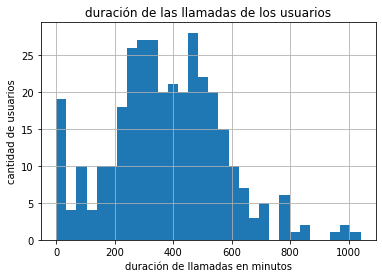

In [58]:
megaline_full_data.query('plan == "surf"').pivot_table(index='user_id', values='duration').hist(bins=30)
plt.title('duración de las llamadas de los usuarios')
plt.xlabel('duración de llamadas en minutos')
plt.ylabel('cantidad de usuarios')
plt.show()

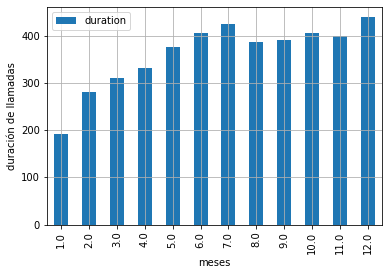

In [59]:


megaline_full_data.query('plan == "surf"').pivot_table(index='month', values='duration').plot(kind='bar', grid=True)
plt.xlabel('meses')
plt.ylabel('duración de llamadas')
plt.show()

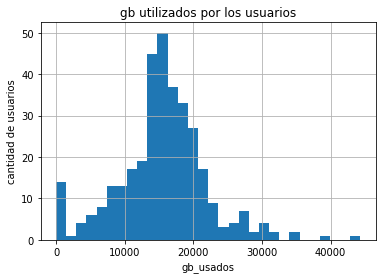

In [60]:
megaline_full_data.query('plan == "surf"').pivot_table(index='user_id', values='mb_used').hist(bins=30)
plt.title('gb utilizados por los usuarios')
plt.xlabel('gb_usados')
plt.ylabel('cantidad de usuarios')
plt.show()

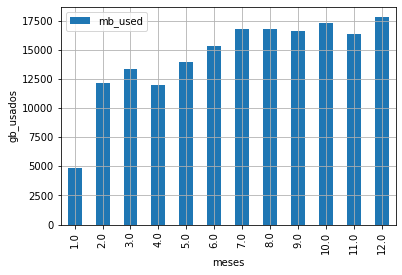

In [61]:
megaline_full_data.query('plan == "surf"').pivot_table(index='month', values='mb_used').plot(kind='bar', grid=True)
plt.xlabel('meses')
plt.ylabel('gb_usados')
plt.show()

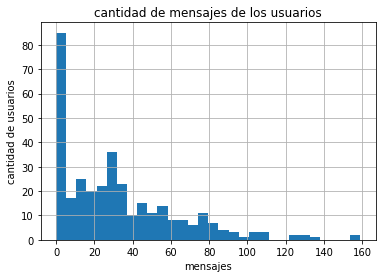

In [62]:
megaline_full_data.query('plan == "surf"').pivot_table(index='user_id', values='messages').hist(bins=30)
plt.title('cantidad de mensajes de los usuarios')
plt.xlabel('mensajes')
plt.ylabel('cantidad de usuarios')
plt.show()

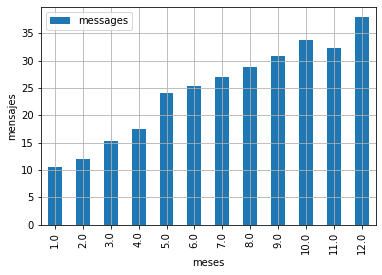

In [63]:
megaline_full_data.query('plan == "surf"').pivot_table(index='month', values='messages').plot(kind='bar', grid=True)
plt.xlabel('meses')
plt.ylabel('mensajes')
plt.show()

In [64]:
surf_duration = megaline_surf['duration']
sd_variance = np.var(surf_duration)
print(sd_variance)

49537.45736883888


In [65]:
surf_mbused = megaline_surf['mb_used']
smb_variance = np.var(surf_mbused)
print(smb_variance)

64969590.72111388


In [66]:
surf_messages = megaline_surf['messages']
sm_variance = np.var(surf_messages)
print(sm_variance)

1125.4048918656479


En esta parte de los usuarios que utilizan el plan Surf, se pudo observar, que con respecto a los mensajes, los clientes suelen tener mayor distribución en cantidades de 0 a 10 mensajes, pero con una media de 31 mensajes, con una dispersión de 33 mensajes, además siendo en el mes de Agosto donde más se realizan los mensajes.

Con respecto a las duraciones de las llamadas, los datos de estos clientes tienen mayor concentración entre 400 y 500 minutos de duración, estando con una media de 403 minutos y con una desviación o variación de los datos de 222 minutos; además siendo el mes de Febrero, donde más se concentran los datos, es decir donde más minutos se encontraron.

Por último, con los gigabytes utilizados por los usuarios de este plan, se pudo observar que hay más concentración de datos ente 15 a 19 gb utilizados, estando con una media de 17 gb y con una desviación o varianza en los datos de 9 gb utilizados en este plan; además siendo el mes de diciembre donde más se utilizaron.

In [67]:
megaline_ultimate = megaline_full_data.query('plan == "ultimate"')

In [68]:
megaline_ultimate['duration'].describe()

count     724.000000
mean      403.948923
std       228.611128
min         0.000000
25%       244.362500
50%       398.235000
75%       531.647500
max      1292.090000
Name: duration, dtype: float64

In [69]:
megaline_ultimate['mb_used'].describe()

count      724.000000
mean     17119.590856
std       7933.579156
min          0.000000
25%      12617.490000
50%      16796.740000
75%      20966.662500
max      46595.330000
Name: mb_used, dtype: float64

In [70]:
megaline_ultimate['messages'].describe()

count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: messages, dtype: float64

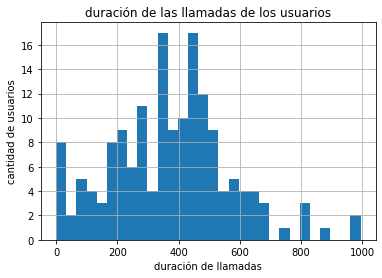

In [71]:
megaline_full_data.query('plan == "ultimate"').pivot_table(index='user_id', values='duration').hist(bins=30)
plt.title('duración de las llamadas de los usuarios')
plt.xlabel('duración de llamadas')
plt.ylabel('cantidad de usuarios')
plt.show()

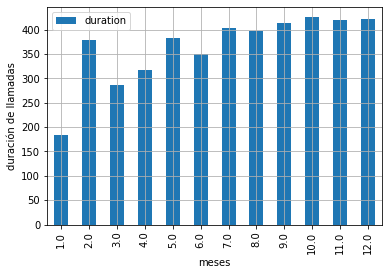

In [72]:
megaline_full_data.query('plan == "ultimate"').pivot_table(index='month', values='duration').plot(y='duration', kind='bar', grid=True)
plt.xlabel('meses')
plt.ylabel('duración de llamadas')
plt.show()

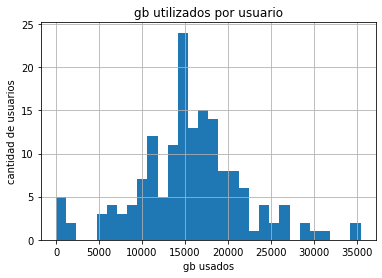

In [73]:
megaline_full_data.query('plan == "ultimate"').pivot_table(index='user_id', values='mb_used').hist(bins=30)
plt.title('gb utilizados por usuario')
plt.xlabel('gb usados')
plt.ylabel('cantidad de usuarios')
plt.show()

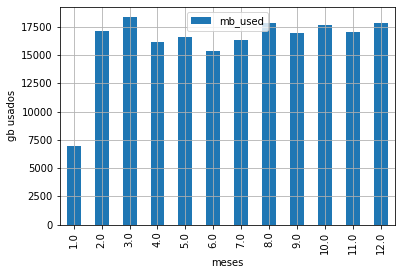

In [74]:
megaline_full_data.query('plan == "ultimate"').pivot_table(index='month', values='mb_used').plot(y='mb_used', kind='bar', grid=True)
plt.xlabel('meses')
plt.ylabel('gb usados')
plt.show()

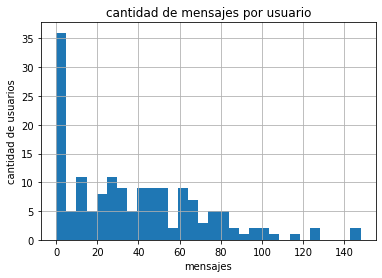

In [75]:
megaline_full_data.query('plan == "ultimate"').pivot_table(index='user_id', values='messages').hist(bins=30)
plt.title('cantidad de mensajes por usuario')
plt.xlabel('mensajes')
plt.ylabel('cantidad de usuarios')
plt.show()

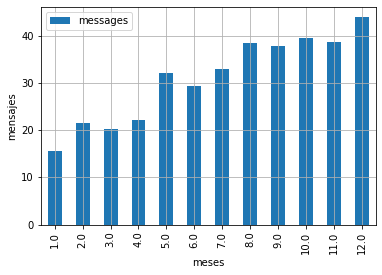

In [76]:
megaline_full_data.query('plan == "ultimate"').pivot_table(index='month', values='messages').plot(y='messages', kind='bar', grid=True)
plt.xlabel('meses')
plt.ylabel('mensajes')
plt.show()

In [77]:
ultimate_duration = megaline_ultimate['duration']
ud_variance = np.var(ultimate_duration)
print(ud_variance)

52190.861148839314


In [78]:
ultimate_mbused = megaline_ultimate['mb_used']
umb_variance = np.var(ultimate_mbused)
print(umb_variance)

62854742.21241668


In [79]:
ultimate_messages = megaline_ultimate['messages']
um_variance = np.var(ultimate_messages)
print(um_variance)

1208.15657908794


En esta parte de los usuarios que utilizan el plan Ultimate, se pudo observar, que con respecto a los mensajes, los clientes suelen tener mayor distribución en cantidades de 0 a 10 mensajes, pero con una media de 37 mensajes, con una dispersión de 34 mensajes, además siendo en el mes de octubre donde más se realizan los mensajes.

Con respecto a las duraciones de las llamadas, los datos de estos clientes tienen mayor concentración entre 400 y 500 minutos de duración, estando con una media de 404 minutos y con una desviación o variación de los datos de 229 minutos; además siendo el mes de marzo, donde más se concentran los datos, es decir donde más minutos se encontraron.

Por último, con los gigabytes utilizados por los usuarios de este plan, se pudo observar que hay más concentración de datos ente 14 a 16 gb utilizados, estando con una media de 18 gb y con una desviación o varianza en los datos de 8 gb utilizados en este plan; además siendo el mes de diciembre donde más se utilizaron.

## Verificar las hipótesis

En esta parte del proyecto, se buscará probar las siguientes hipótesis:

- Que el ingreso promedio de los usuarios de las tarifas ultimate y surf difieren
- Que el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al resto de los usuarios.

Esto se realizará a través de un criterio de verificación de hipótesis.

H.N = El ingreso promedio de los usuarios de las tarifas ultimate y surf no difieren.

H.A = El ingreso promedio de los usuarios de las tarifas ultimate y surf difieren.

In [80]:
surf_income = megaline_surf['income']
ultimate_income = megaline_ultimate['income']
alpha = 0.05
results = st.ttest_ind(surf_income, ultimate_income)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.1295427582201259e-58
Rechazamos la hipótesis nula


H.N = El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al resto de los usuarios.


H.A = El ingreso promedio de los usuarios den el área de estados Nueva York-Nueva Jersey es diferente al resto de los usuarios.

In [81]:
megaline_newyork_newjearsey = megaline_full_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
megaline_other_cities =  megaline_full_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
ny_nj_income = megaline_newyork_newjearsey['income']
oc_income = megaline_other_cities['income']
alpha = 0.05
results = st.ttest_ind(ny_nj_income, oc_income)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.003362518469055432
Rechazamos la hipótesis nula


Para poder verificar las hipótesis en ambos casos, se decidió realizar la prueba de hipótesis sobre la igualdad de dos medias de dos poblaciones, ya que se estaban utilizan dos datasets de dos poblaciones estadísticas diferentes, estableciendo un valor de significancia(alpha) del 5%; aunque todo provenga de uno mismo pero más grande, para comparar en este caso los ingresos promedios. Resultando en ambos casos, que se rechace la hipótesis nula, es decir, que no hay gran diferencia en los ingresos promedios de cada usuario.

## Conclusión general

Después de analizar los dataset se pudo concluir lo siguiente:


1. Primero, se decidió combinar los datasets, pero antes agrupando los datsets de las llamadas en minutos, los sms y los mb usados por clientes, para luego juntarlos con el datset de los usuarios.
2. Se encontraron valores ausentes en algunas columnas del dataframe, como la de churn_date, duration, y otras más. Esto pudo ocurrir debido a factores que pueden influenciar estos datos como que se recuperaron los datos de los clientes justo cuando estaban por terminar con su servicio, no existen datos de llamadas, sms o gb utilizados; o por errores de digitación. Por este motivo, se decidió lidiar con estos datos de distintas formas, ya que la cantidad variaba según la columna; en algunos casos se reemplazaron por valores de la última fecha de servicio, como en el caso de churn_date; en otros se rellenaron con valor cero , como en el caso del duration, mb_used y messages; ya que no se les podía cargar al cliente por un servicio que no usaron.
3. No se encontraron datos duplicados.
4. Se tuvo que añadir una nueva columna 'income' para los ingresos, debido a que se debe conocer lo que cada plan (surf y ultimate) obtienen por cliente, a través de una operación matemática de la tarifa mensual de cada plan con las llamadas, sms y mb utilizados añadiendo el otro monto si es que se exceden del plan, para cada usuario.

Asimismo, se comprobó lo siguiente:

1. El ingreso promedio de los planes surf y ultimate sí difieren, siendo el plan ultimate el que mayor ingreso genera, esto se realizó a través de la verificación de las hipótesis nulas y alternativas; siendo la nula que no difieren; es decir la contradicción de la hipótesis; y la alternativa que sí difieren.
2. El ingreso promedio de la ciudad de Nueva York y New Jearsey sí difieren con el resto, siendo el resto de las ciudades las que mayor ingreso genera, esto se realizó a través de la verificación de las hipótesis nulas y alternativas; siendo la nula que no difieren; es decir la contradicción de la hipótesis; y la alternativa que sí difieren.
3. Con respecto al comportamiento de los clientes con la duración de las llamadas en minutos, los sms y los gb utilizados por cada plan tarifario; se pudo observar que en algunos casos difieren con los gb utilizados o la duración de la llamada, y en la cantidad de mensajes son parecidos; según las cantidades, las medias, las desviaciones en los datos, etc.
4. Por último, se pudo concluir que aunque hay más clientes que utilizan el plan Surf; puede ser porque sea más barato; y es el plan que más ingresos genera.

